<a href="https://colab.research.google.com/github/farrukh61/CCPP-Power-Output-Prediction/blob/main/CCPP_Power_Output_Combined_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/drive')

In [ ]:



import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
dtr = DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import warnings
from sklearn.ensemble import RandomForestRegressor
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.4f}'.format
from sklearn.ensemble import StackingRegressor



In [ ]:
# DATA
df = pd.read_csv('/drive/MyDrive/ml project/ccpp_data.csv')
x = df.drop('PE',axis=1)
y = df.PE
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=324)


# Data scaling
scaler=StandardScaler()
scaler.fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

# **Paper Results**

---




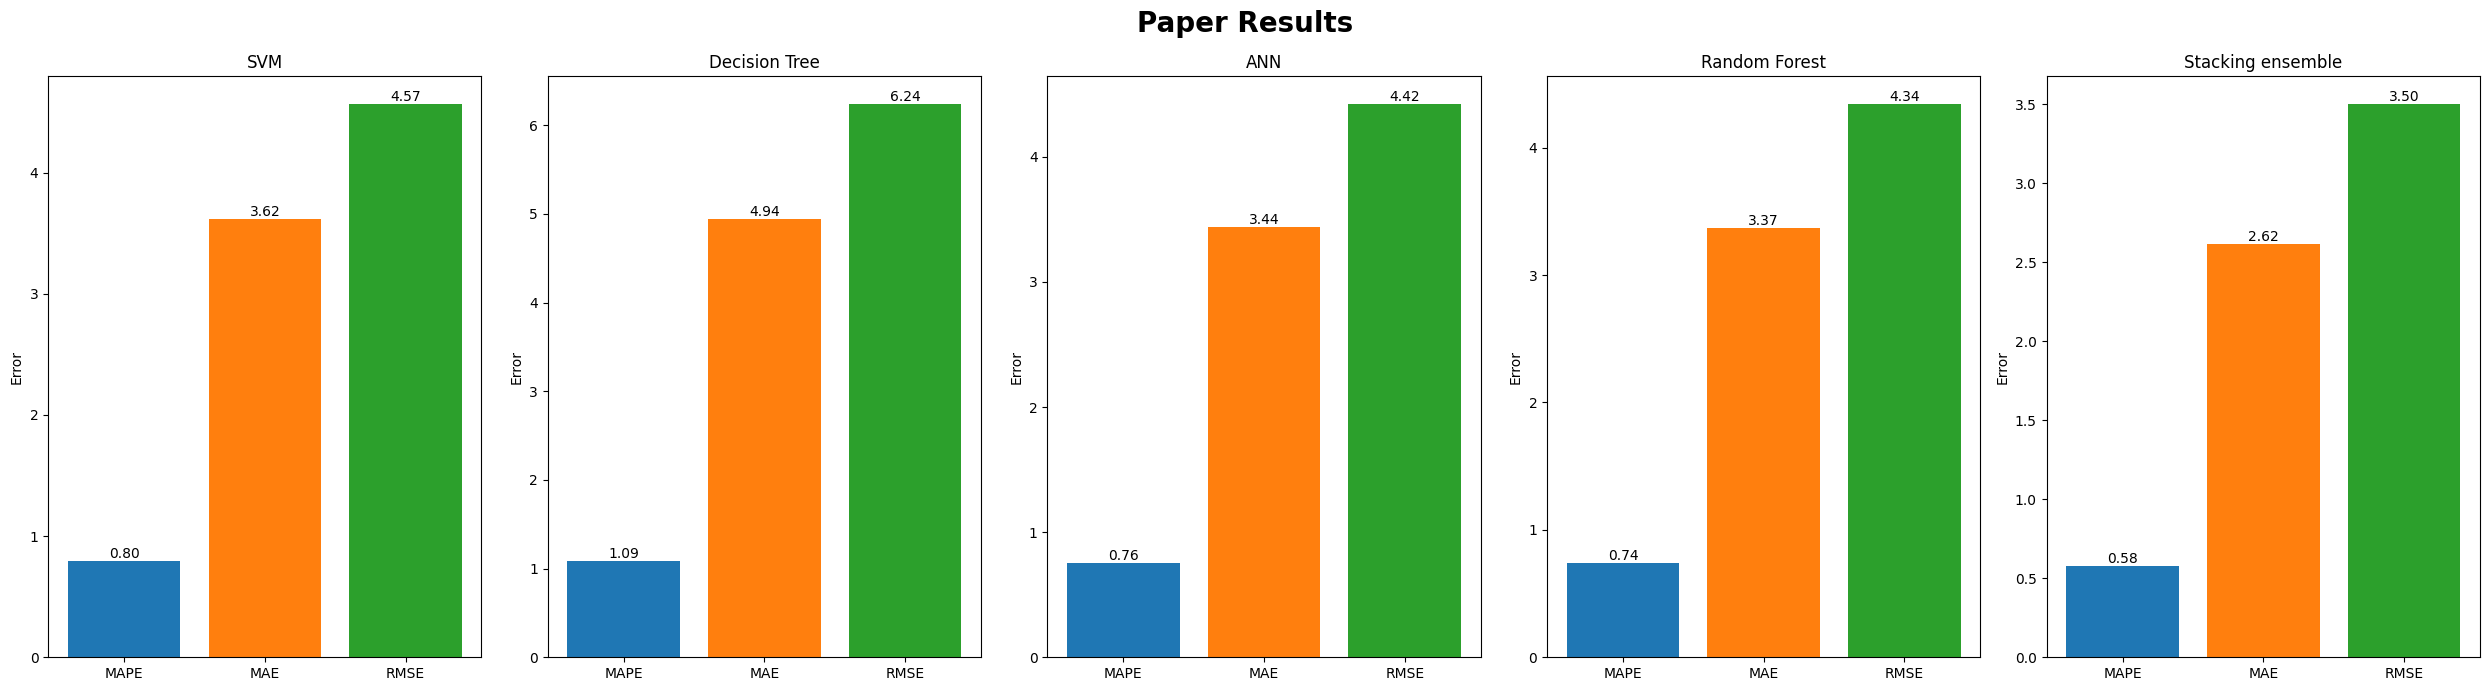

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
estimators = ['SVM', 'Decision Tree', 'ANN', 'Random Forest', 'Stacking ensemble']
svm_error_ppr = np.array([0.797, 3.617, 4.566])
dtr_error_ppr = np.array([1.089, 4.944, 6.239])
ann_error_ppr = np.array([0.756, 3.442, 4.422])
rf_error_ppr = np.array([0.742, 3.369, 4.343])
ensemble_error_ppr = np.array([0.577, 2.615, 3.501])
metrics = ['MAPE', 'MAE', 'RMSE']

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(estimators), figsize=(25,7))
fig.suptitle('Paper Results', fontsize=20, fontweight= 'bold')
# Loop over estimators
for i, estimator in enumerate(estimators):
    ax = axs[i]
    ax.set_title(estimator)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Error')
    
    # Define color map for bars
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.arange(len(metrics)))
    
    # Plot bars for each error metric
    if estimator == 'SVM':
        values = svm_error_ppr
    elif estimator == 'Decision Tree':
        values = dtr_error_ppr
    elif estimator == 'ANN':
        values = ann_error_ppr
    elif estimator == 'Random Forest':
        values = rf_error_ppr
    elif estimator == 'Stacking ensemble':
        values = ensemble_error_ppr
    
    ax.bar(metrics, values, color=colors)
    
    # Add text on bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


# **Stacking of predictors**

---



In [ ]:
# Defining Individual models

# Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=10)
# Support vector regressor
from sklearn import svm
svr = svm.SVR(kernel='rbf',C=0.5,)

# Artificial Neural Network
nn = MLPRegressor(hidden_layer_sizes = (3,3,3,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic', 
                 warm_start = True,
                 max_iter = 4000,
                 random_state = 2345,
                 early_stopping = True,
                 )
# Random forest
rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

# Stacking Ensemble
estimators = [('Decision Tree', dtr),
             ('Support vector',svr),
             ('ANN', nn)]
ens = StackingRegressor(estimators = estimators,
                                      final_estimator = nn,n_jobs=-1)
ens

StackingRegressor(estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10)),
                              ('Support vector', SVR(C=0.5)),
                              ('ANN',
                               MLPRegressor(activation='logistic',
                                            early_stopping=True,
                                            hidden_layer_sizes=(3, 3, 3),
                                            max_iter=4000, random_state=2345,
                                            warm_start=True))],
                  final_estimator=MLPRegressor(activation='logistic',
                                               early_stopping=True,
                                               hidden_layer_sizes=(3, 3, 3),
                                               max_iter=4000, random_state=2345,
                                               warm_start=True),
                  n_jobs=-1)

# **Reproduced Results**

---



In [ ]:
# Reproducing the Results with the hyper parameters mentioned in the paper
my_estimators=[svr,dtr,nn,rf,ens]
MAPE = [0] * len(my_estimators)
MAE = [0] * len(my_estimators)
RMSE = [0] * len(my_estimators)
y_pred = []
# model = []
y_pred=[]
for i,est in enumerate(my_estimators):
    model=est.fit(xs_train,y_train)
    y_pred = model.predict(x_test)
    MAPE[i]=mape(y_test,y_pred)
    MAE[i]=mae(y_test,y_pred)
    RMSE[i]=np.sqrt(mse(y_test,y_pred))

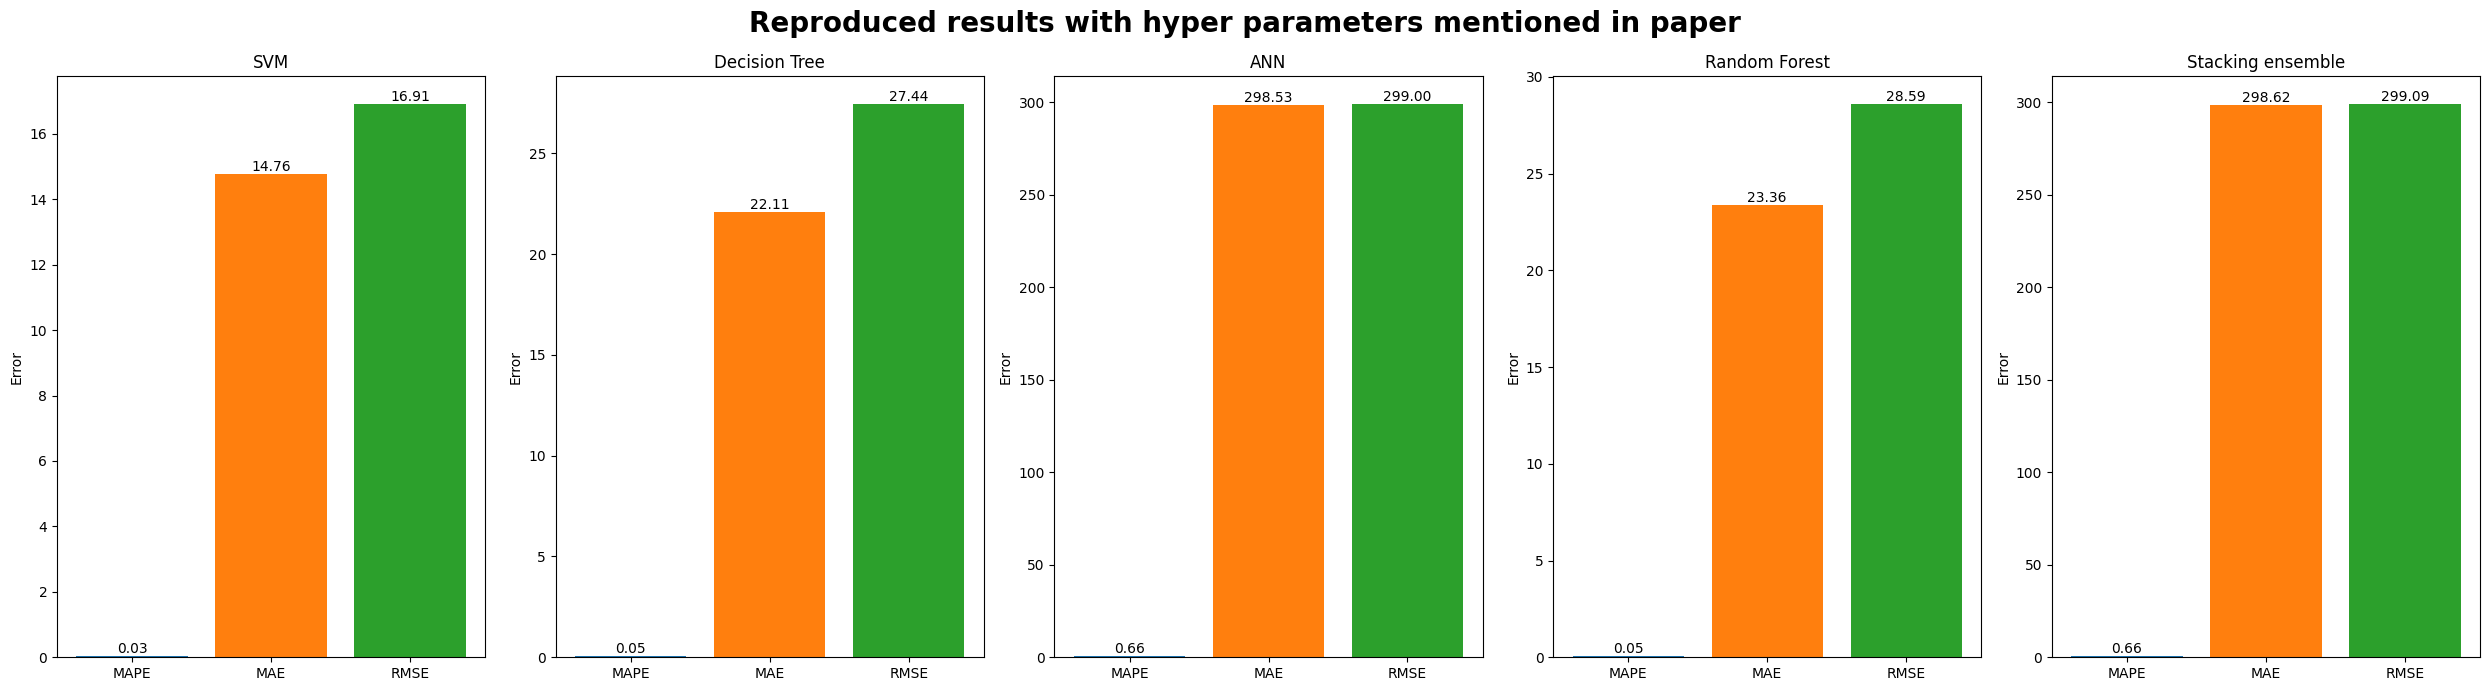

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their colors
metrics = ['MAPE', 'MAE', 'RMSE']
cmap = plt.get_cmap('tab10')
colors = cmap(np.arange(len(metrics)))

# Define the estimators and their errors
estimators = ['SVM', 'Decision Tree', 'ANN', 'Random Forest', 'Stacking ensemble']
svm_errors = [MAPE[0], MAE[0], RMSE[0]]
dtr_errors = [MAPE[1], MAE[1], RMSE[1]]
ann_errors = [MAPE[2], MAE[2], RMSE[2]]
rf_errors = [MAPE[3], MAE[3], RMSE[3]]
ensemble_errors = [MAPE[4], MAE[4], RMSE[4]]

fig, axs = plt.subplots(nrows=1, ncols=len(estimators), figsize=(25,7))
fig.suptitle('Reproduced results with hyper parameters mentioned in paper', fontsize=20, fontweight= 'bold')

# Loop over the estimators and plot the bars with text labels
for i, estimator in enumerate(estimators):
    ax = axs[i]
    ax.set_title(estimator)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Error')
    
    # Get the errors for the current estimator
    if estimator == 'SVM':
        values = svm_errors
    elif estimator == 'Decision Tree':
        values = dtr_errors
    elif estimator == 'ANN':
        values = ann_errors
    elif estimator == 'Random Forest':
        values = rf_errors
    elif estimator == 'Stacking ensemble':
        values = ensemble_errors
    
    # Plot the bars
    ax.bar(metrics, values, color=colors)
    
    # Add text labels on the bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


# **Fine tuning individual models based on GridsearchCV**

---


In [ ]:
my_estimators=[svr,dtr,nn,rf]
n = np.arange(3,21,2)
i = np.arange(6,12,2)
parameters = [{'kernel':('linear', 'rbf','poly'),'C':np.arange(0.1,1,0.1)},{'max_depth': np.arange(4,16,2)},{'hidden_layer_sizes':(n,n,n,)},
             {'n_estimators':i, 'max_depth':i}]
from sklearn.model_selection import GridSearchCV


for i,est in enumerate(my_estimators):
    if est==svr:
        clf_svr = GridSearchCV(svr,parameters[i])
        clf_svr.fit(xs_train,y_train)
        
    elif est==dtr:
        clf_dtr = GridSearchCV(dtr,parameters[i])
        clf_dtr.fit(xs_train,y_train)
    elif est==nn:
        clf_nn = GridSearchCV(nn,parameters[i])
        clf_nn.fit(xs_train,y_train)
    elif est==rf:
        clf_rf = GridSearchCV(rf,parameters[i])
        clf_rf.fit(xs_train,y_train)

### Reproducing the Results with the hyper parameters obtained form GridSearchCV

---




In [ ]:
# Ensembel model
# Stacking Ensemble
clf_estimators = [('Decision Tree', clf_dtr),
             ('Support vector',clf_svr),
             ('ANN', clf_nn)]
clf_ens = StackingRegressor(estimators = clf_estimators,
                                      final_estimator = clf_nn,n_jobs=-1)




my_estimators_clf=[clf_svr,clf_dtr,clf_nn,clf_rf,clf_ens]
MAPE = [0] * len(my_estimators_clf)
MAE = [0] * len(my_estimators_clf)
RMSE = [0] * len(my_estimators_clf)
y_pred = []
# model = []
y_pred=[]
for i,est in enumerate(my_estimators_clf):
    model=est.fit(xs_train,y_train)
    y_pred = model.predict(x_test)
    MAPE[i]=mape(y_test,y_pred)
    MAE[i]=mae(y_test,y_pred)
    RMSE[i]=np.sqrt(mse(y_test,y_pred))

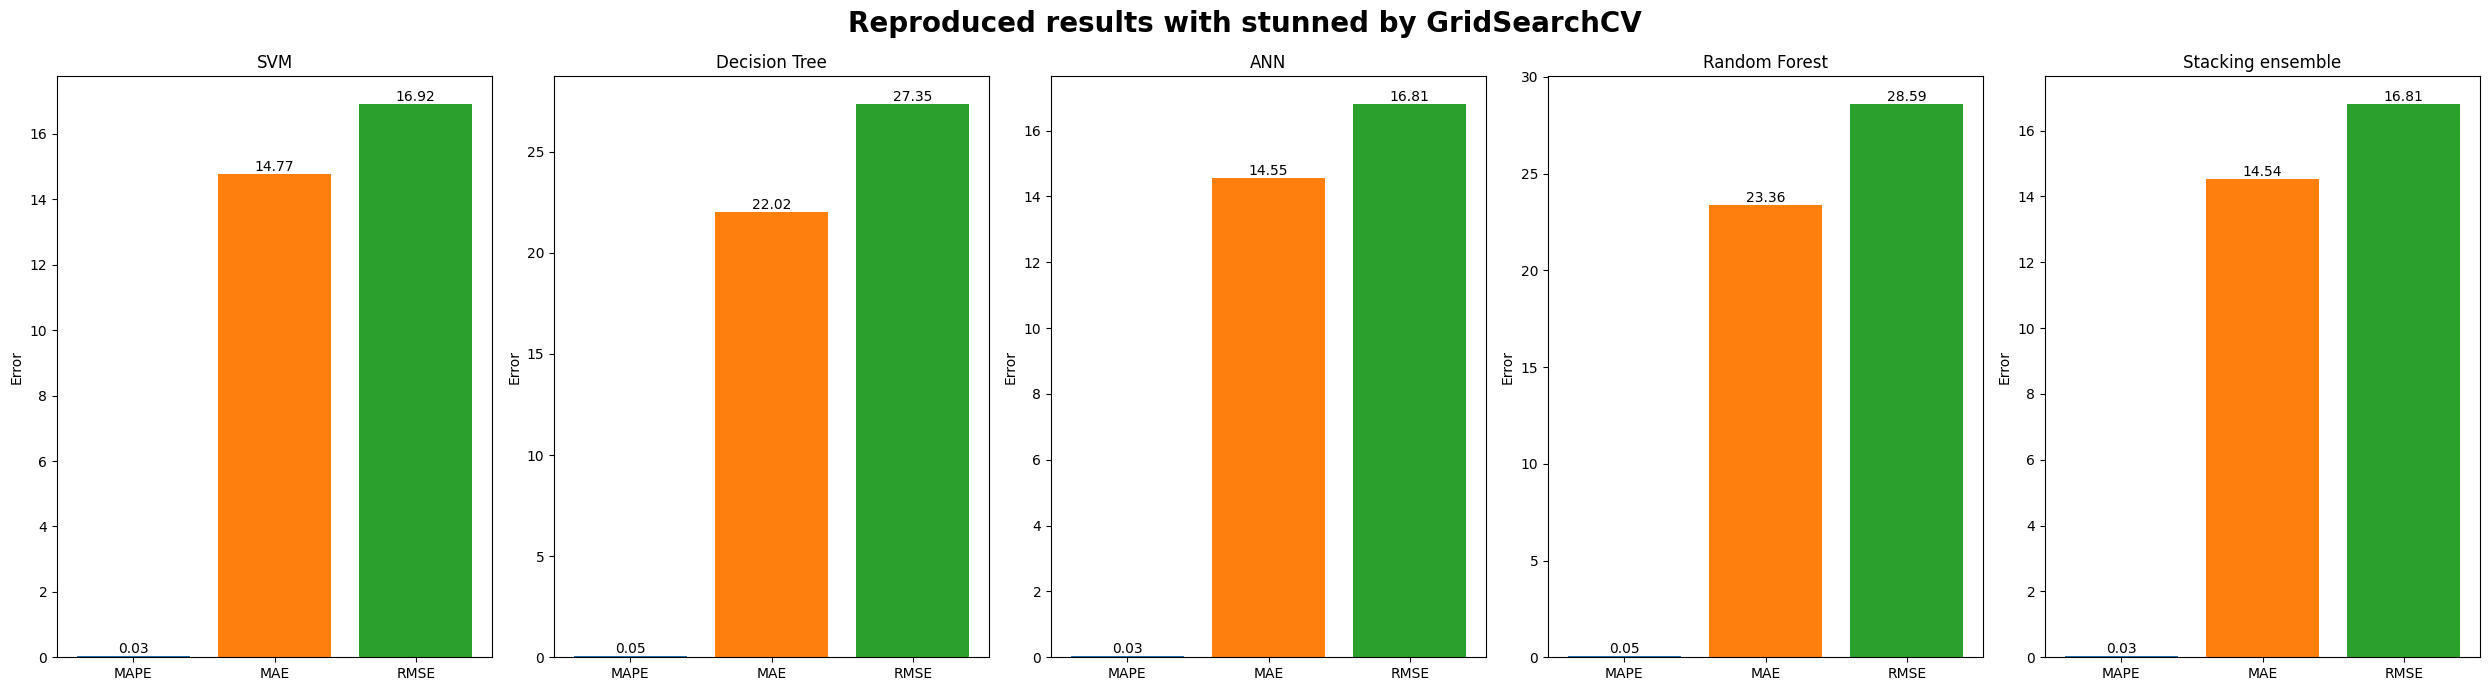

In [ ]:
# results ploting
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their colors
metrics = ['MAPE', 'MAE', 'RMSE']
cmap = plt.get_cmap('tab10')
colors = cmap(np.arange(len(metrics)))

# Define the estimators and their errors
estimators = ['SVM', 'Decision Tree', 'ANN', 'Random Forest', 'Stacking ensemble']
svm_errors = [MAPE[0], MAE[0], RMSE[0]]
dtr_errors = [MAPE[1], MAE[1], RMSE[1]]
ann_errors = [MAPE[2], MAE[2], RMSE[2]]
rf_errors = [MAPE[3], MAE[3], RMSE[3]]
ensemble_errors = [MAPE[4], MAE[4], RMSE[4]]

fig, axs = plt.subplots(nrows=1, ncols=len(estimators), figsize=(25,7))
fig.suptitle('Reproduced results with stunned by GridSearchCV', fontsize=20, fontweight= 'bold')

# Loop over the estimators and plot the bars with text labels
for i, estimator in enumerate(estimators):
    ax = axs[i]
    ax.set_title(estimator)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Error')
    
    # Get the errors for the current estimator
    if estimator == 'SVM':
        values = svm_errors
    elif estimator == 'Decision Tree':
        values = dtr_errors
    elif estimator == 'ANN':
        values = ann_errors
    elif estimator == 'Random Forest':
        values = rf_errors
    elif estimator == 'Stacking ensemble':
        values = ensemble_errors
    
    # Plot the bars
    ax.bar(metrics, values, color=colors)
    
    # Add text labels on the bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# **Fine tuning individual models based on loss convergence**

---



### 1. SVR base model

In [ ]:
# Defining Individual models
from sklearn.metrics import mean_absolute_error ,mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
# Decision Tree Regressor
conv_dtr = DecisionTreeRegressor(max_depth=10)
# Support vector regressor
from sklearn import svm
conv_svr = svm.SVR(kernel='rbf',C=8.5,)

# Artificial Neural Network
conv_nn = MLPRegressor(hidden_layer_sizes = (17,17,17,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic',
                 warm_start = True,
                 max_iter = 1000,
                 random_state = 2345,
                 early_stopping = True,
                 )
# Random forest
conv_rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

# Stacking Ensemble
conv_estimators = [('Decision Tree',conv_dtr),
             ('Support vector',conv_svr),
             ('ANN', conv_nn)]
conv_ens = StackingRegressor(estimators = conv_estimators,
                                      final_estimator = conv_svr,n_jobs=-1)
conv_ens

StackingRegressor(estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10)),
                              ('Support vector', SVR(C=8.5)),
                              ('ANN',
                               MLPRegressor(activation='logistic',
                                            early_stopping=True,
                                            hidden_layer_sizes=(17, 17, 17),
                                            max_iter=1000, random_state=2345,
                                            warm_start=True))],
                  final_estimator=SVR(C=8.5), n_jobs=-1)

In [ ]:
# Calculation
my_estimators_conv=[conv_svr,conv_dtr,conv_nn,conv_rf,conv_ens]
conv_MAPE = [0] * len(my_estimators_conv)
conv_MAE = [0] * len(my_estimators_conv)
conv_RMSE = [0] * len(my_estimators_conv)
y_pred = []
# model = []
y_pred=[]
for i,est in enumerate(my_estimators_conv):
    model=est.fit(xs_train,y_train)
    y_pred = model.predict(xs_test)
    conv_MAPE[i]=mean_absolute_percentage_error(y_test,y_pred)
    conv_MAE[i]=mean_absolute_error(y_test,y_pred)
    conv_RMSE[i]=np.sqrt(mean_squared_error(y_test,y_pred))




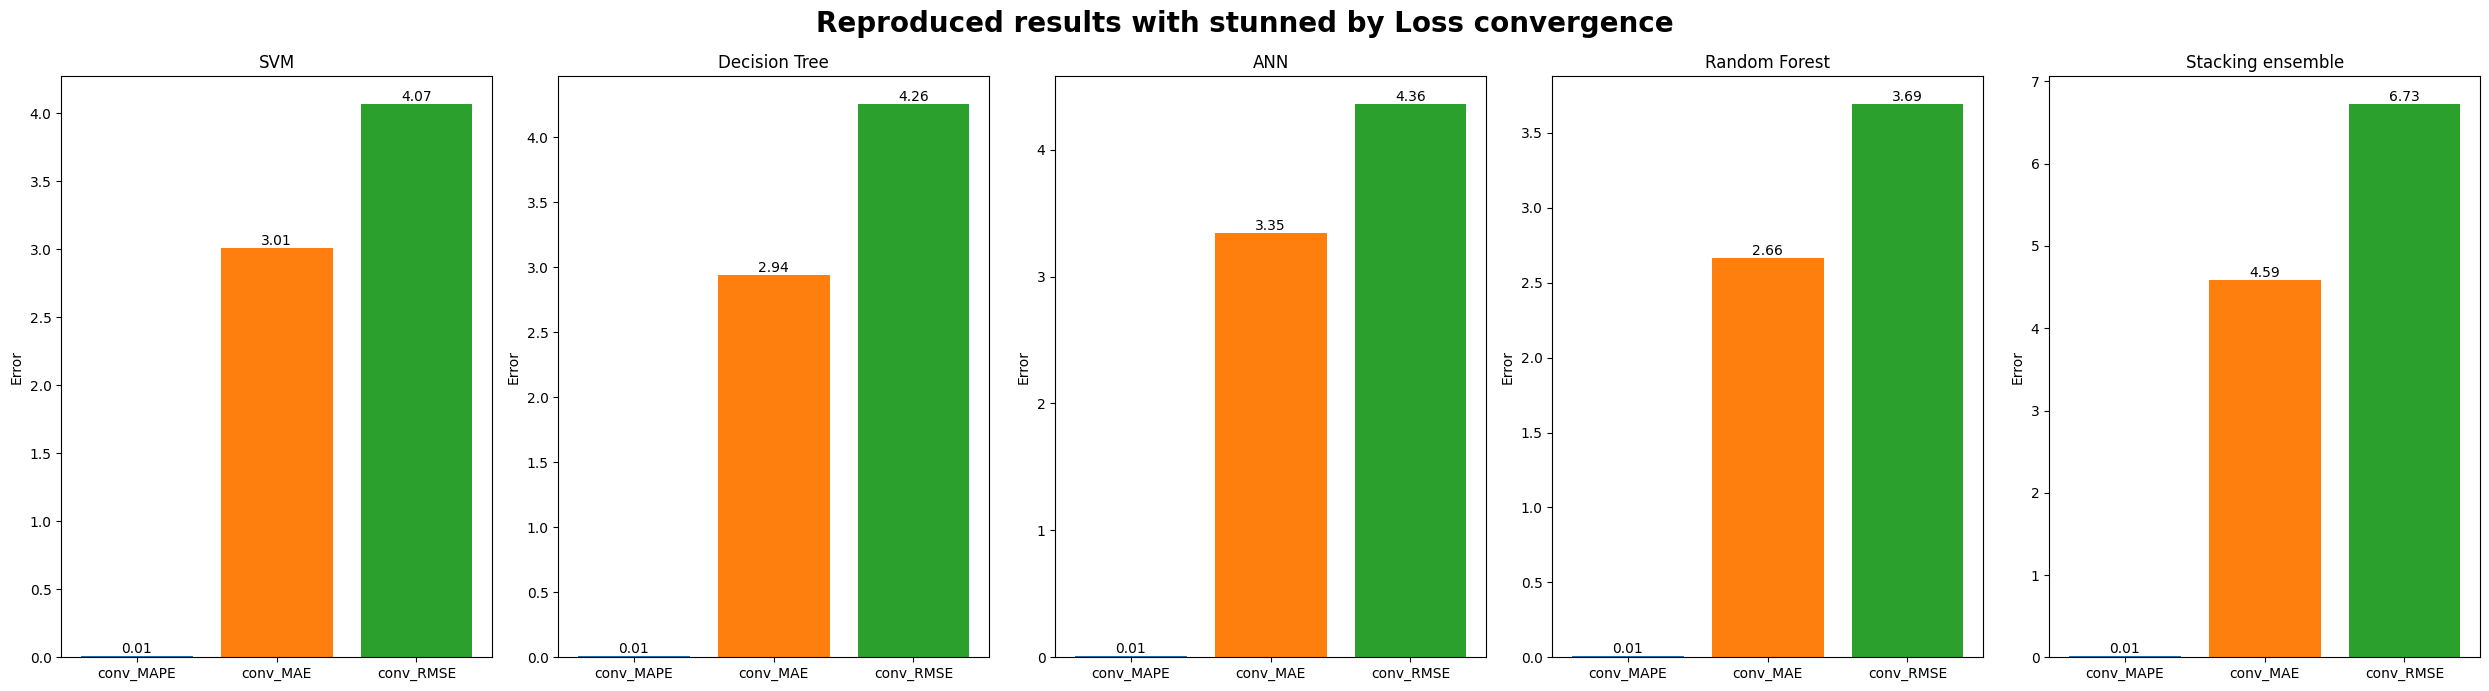

In [ ]:
# results ploting
import matplotlib.pyplot as plt
import numpy as np

# Define the conv_metrics and their colors
conv_metrics = ['conv_MAPE', 'conv_MAE', 'conv_RMSE']
cmap = plt.get_cmap('tab10')
colors = cmap(np.arange(len(conv_metrics)))

# Define the conv_estimators and their errors
conv_estimators = ['SVM', 'Decision Tree', 'ANN', 'Random Forest', 'Stacking ensemble']
conv_svm_errors = [conv_MAPE[0], conv_MAE[0], conv_RMSE[0]]
conv_dtr_errors = [conv_MAPE[1], conv_MAE[1], conv_RMSE[1]]
conv_ann_errors = [conv_MAPE[2], conv_MAE[2], conv_RMSE[2]]
conv_rf_errors = [conv_MAPE[3], conv_MAE[3], conv_RMSE[3]]
conv_ensemble_errors = [conv_MAPE[4], conv_MAE[4], conv_RMSE[4]]

fig, axs = plt.subplots(nrows=1, ncols=len(conv_estimators), figsize=(25,7))
fig.suptitle('Reproduced results with stunned by Loss convergence', fontsize=20, fontweight= 'bold')

# Loop over the conv_estimators and plot the bars with text labels
for i, estimator in enumerate(conv_estimators):
    ax = axs[i]
    ax.set_title(estimator)
    ax.set_xticklabels(conv_metrics)
    ax.set_ylabel('Error')
    
    # Get the errors for the current estimator
    if estimator == 'SVM':
        values = conv_svm_errors
    elif estimator == 'Decision Tree':
        values = conv_dtr_errors
    elif estimator == 'ANN':
        values = conv_ann_errors
    elif estimator == 'Random Forest':
        values = conv_rf_errors
    elif estimator == 'Stacking ensemble':
        values = conv_ensemble_errors
    
    # Plot the bars
    ax.bar(conv_metrics, values, color=colors)
    
    # Add text labels on the bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

### 2. NN base model

---



In [ ]:
# Defining Individual models
from sklearn.metrics import mean_absolute_error ,mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
# Decision Tree Regressor
conv_dtr = DecisionTreeRegressor(max_depth=10)
# Support vector regressor
from sklearn import svm
conv_svr = svm.SVR(kernel='rbf',C=8.5,)

# Artificial Neural Network
conv_nn = MLPRegressor(hidden_layer_sizes = (17,17,17,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic',
                 warm_start = True,
                 max_iter = 1000,
                 random_state = 2345,
                 early_stopping = True,
                 )
# Random forest
conv_rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)

# Stacking Ensemble
conv_estimators = [('Decision Tree',conv_dtr),
             ('Support vector',conv_svr),
             ('ANN', conv_nn)]
conv_ens = StackingRegressor(estimators = conv_estimators,
                                      final_estimator = conv_nn,n_jobs=-1)
conv_ens

StackingRegressor(estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10)),
                              ('Support vector', SVR(C=8.5)),
                              ('ANN',
                               MLPRegressor(activation='logistic',
                                            early_stopping=True,
                                            hidden_layer_sizes=(17, 17, 17),
                                            max_iter=1000, random_state=2345,
                                            warm_start=True))],
                  final_estimator=MLPRegressor(activation='logistic',
                                               early_stopping=True,
                                               hidden_layer_sizes=(17, 17, 17),
                                               max_iter=1000, random_state=2345,
                                               warm_start=True),
                  n_jobs=-1)

In [ ]:
# Calculation
my_estimators_conv=[conv_svr,conv_dtr,conv_nn,conv_rf,conv_ens]
conv_MAPE = [0] * len(my_estimators_conv)
conv_MAE = [0] * len(my_estimators_conv)
conv_RMSE = [0] * len(my_estimators_conv)
y_pred = []
# model = []
y_pred=[]
for i,est in enumerate(my_estimators_conv):
    model=est.fit(xs_train,y_train)
    y_pred = model.predict(xs_test)
    conv_MAPE[i]=mean_absolute_percentage_error(y_test,y_pred)
    conv_MAE[i]=mean_absolute_error(y_test,y_pred)
    conv_RMSE[i]=np.sqrt(mean_squared_error(y_test,y_pred))




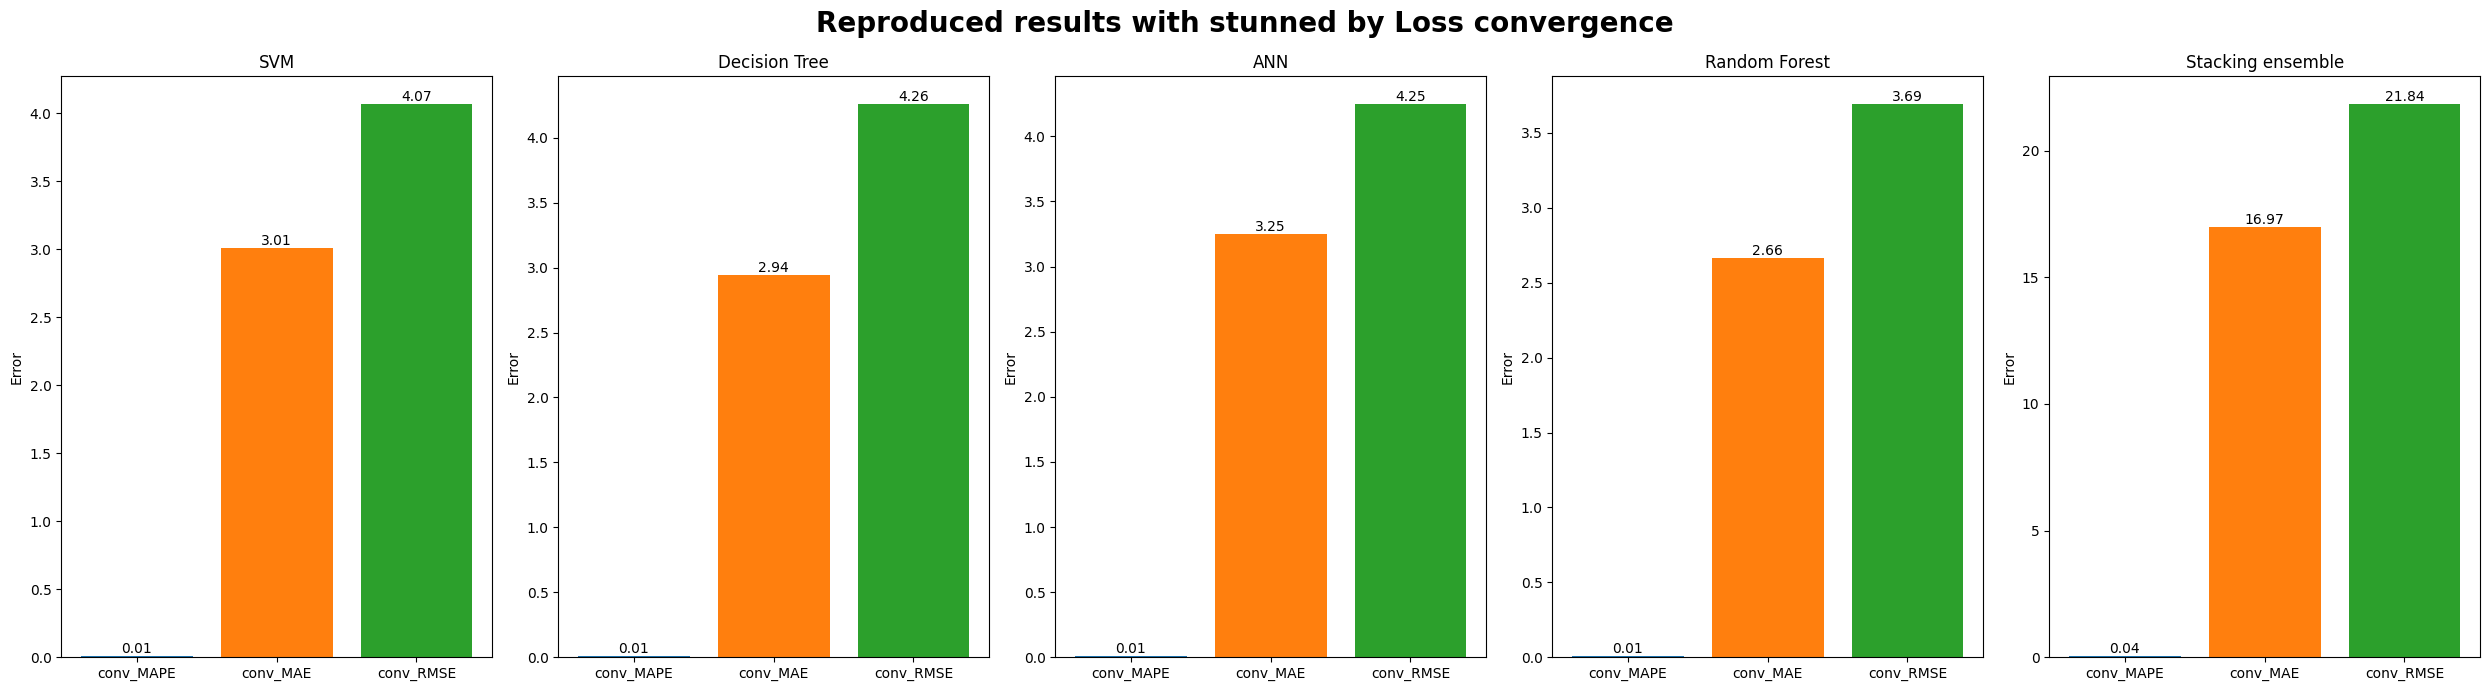

In [ ]:
# results ploting
import matplotlib.pyplot as plt
import numpy as np

# Define the conv_metrics and their colors
conv_metrics = ['conv_MAPE', 'conv_MAE', 'conv_RMSE']
cmap = plt.get_cmap('tab10')
colors = cmap(np.arange(len(conv_metrics)))

# Define the conv_estimators and their errors
conv_estimators = ['SVM', 'Decision Tree', 'ANN', 'Random Forest', 'Stacking ensemble']
conv_svm_errors = [conv_MAPE[0], conv_MAE[0], conv_RMSE[0]]
conv_dtr_errors = [conv_MAPE[1], conv_MAE[1], conv_RMSE[1]]
conv_ann_errors = [conv_MAPE[2], conv_MAE[2], conv_RMSE[2]]
conv_rf_errors = [conv_MAPE[3], conv_MAE[3], conv_RMSE[3]]
conv_ensemble_errors = [conv_MAPE[4], conv_MAE[4], conv_RMSE[4]]

fig, axs = plt.subplots(nrows=1, ncols=len(conv_estimators), figsize=(25,7))
fig.suptitle('Reproduced results with stunned by Loss convergence', fontsize=20, fontweight= 'bold')

# Loop over the conv_estimators and plot the bars with text labels
for i, estimator in enumerate(conv_estimators):
    ax = axs[i]
    ax.set_title(estimator)
    ax.set_xticklabels(conv_metrics)
    ax.set_ylabel('Error')
    
    # Get the errors for the current estimator
    if estimator == 'SVM':
        values = conv_svm_errors
    elif estimator == 'Decision Tree':
        values = conv_dtr_errors
    elif estimator == 'ANN':
        values = conv_ann_errors
    elif estimator == 'Random Forest':
        values = conv_rf_errors
    elif estimator == 'Stacking ensemble':
        values = conv_ensemble_errors
    
    # Plot the bars
    ax.bar(conv_metrics, values, color=colors)
    
    # Add text labels on the bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

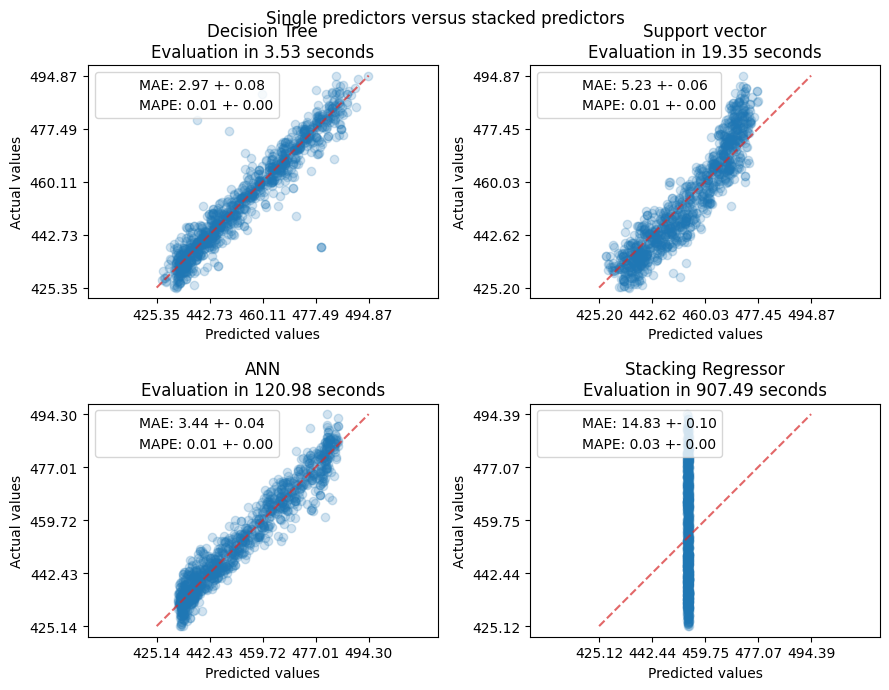

In [ ]:



import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_validate, cross_val_predict

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", ens)]
):
    scorers = {"MAE": "neg_mean_absolute_error","MAPE": "neg_mean_absolute_percentage_error" }

    start_time = time.time()
    scores = cross_validate(
        est, x, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, x, y, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }

    display = PredictionErrorDisplay.from_predictions(
        y_true=y,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        ax=ax,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

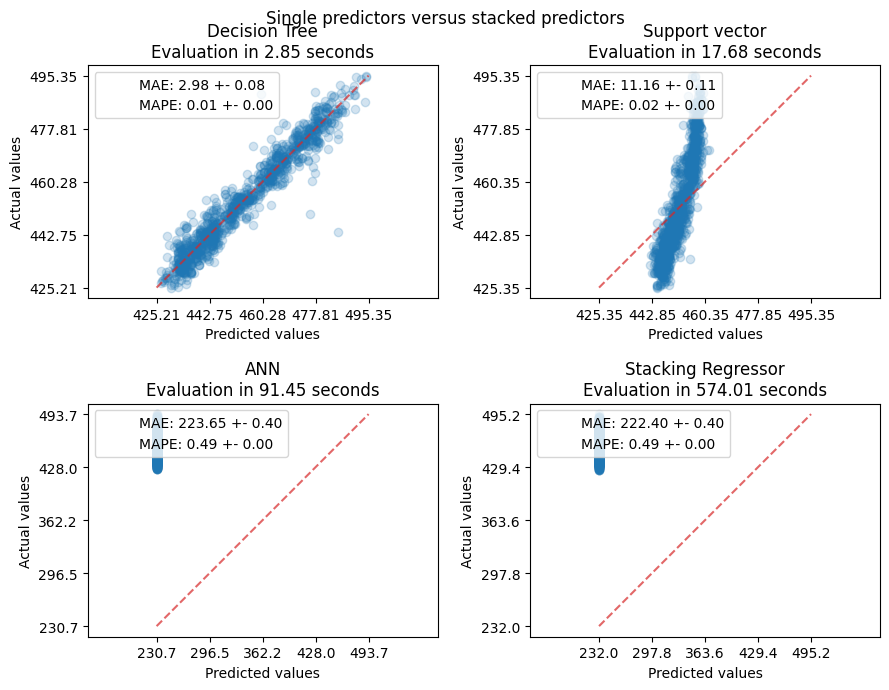

In [ ]:
stacking_regressor.fit(xs_train, y_train)

StackingRegressor(estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10)),
                              ('Support vector', SVR()),
                              ('ANN',
                               MLPRegressor(activation='logistic',
                                            hidden_layer_sizes=(3, 3, 3),
                                            max_iter=1000, random_state=2345,
                                            warm_start=True))],
                  final_estimator=MLPRegressor(activation='logistic',
                                               hidden_layer_sizes=(3, 3, 3),
                                               max_iter=1000, random_state=2345,
                                               warm_start=True),
                  n_jobs=-1)

In [ ]:
#Essenlibraies for data import

import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import scatterplotmatrix, heatmap

In [ ]:
def evaluate(model,train_features, train_labels, test_features, test_labels):  #feature -> x and label -> y
    
    
    pred_labels_train = model.predict(train_features)
    mean_abs_per_err_train = mape(train_labels,pred_labels_train)
    mean_abs_err_train = mean_absolute_error(train_labels,pred_labels_train)
    rmse_train = np.sqrt(mean_squared_error(train_labels,pred_labels_train))
#     print('Train Score\nMAPE = ',mean_abs_per_err_train)
#     print('MAE = ',mean_abs_err_train)
#     print('RMSE = ',rmse_train)
    
    
    
    
    
    
    pred_labels_test = model.predict(test_features)
    mean_abs_per_err_test = mape(test_labels,pred_labels_test)
    mean_abs_err_test = mean_absolute_error(test_labels,pred_labels_test)
    rmse_test = np.sqrt(mean_squared_error(test_labels,pred_labels_test))
#     print('\n\nTest Score\nMAPE = ',mean_abs_per_err_test)
#     print('MAE = ',mean_abs_err_test)
#     print('RMSE = ',rmse_test)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#     # Train error plot
#     train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
#     metrics = ["MAPE", "MAE", "RMSE"]
#     sns.barplot(x=metrics, y=train_error_values, ax=ax1)
#     ax1.set_title("Train Errors")
#     ax1.set_ylim(bottom=0)
#     ax1.set_ylabel("Error Value")
    
#     # Add value labels to train error bars
#     for i, value in enumerate(train_error_values):
#         ax1.text(i, value, f"{value:.3f}", ha="center", va="bottom")
    
#     # Test error plot
#     test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
#     metrics = ["MAPE", "MAE", "RMSE"]
#     sns.barplot(x=metrics, y=test_error_values, ax=ax2)
#     ax2.set_title("Test Errors")
#     ax2.set_ylim(bottom=0)
# #     ax2.set_ylabel("Error Value")
    
#     # Add value labels to test error bars
#     for i, value in enumerate(test_error_values):
#         ax2.text(i, value, f"{value:.3f}", ha="center", va="bottom")
    
#     plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))

    # Train error bars
    train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
    train_metrics = ["MAPE", "MAE", "RMSE"]
    train_pos = np.arange(len(train_metrics))
    ax.bar(train_pos - 0.2, train_error_values, width=0.4, label="Train Errors")
    
    # Add value labels to train error bars
    for i, value in enumerate(train_error_values):
        ax.text(train_pos[i]-0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Test error bars
    test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
    test_metrics = ["MAPE", "MAE", "RMSE"]
    test_pos = np.arange(len(train_metrics))
    ax.bar(test_pos + 0.2, test_error_values, width=0.4, label="Test Errors")
    
    # Add value labels to test error bars
    for i, value in enumerate(test_error_values):
        ax.text(test_pos[i]+0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Set axis labels and legend
    ax.set_xticks(range(len(train_metrics)))
    ax.set_xticklabels(train_metrics)
    ax.set_title("Train and Test Errors")
    ax.set_ylabel("Error Value")
    ax.legend()
    
    plt.show()
                
                    
                                
            
    
    
    
    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    sns.distplot(train_labels, hist=False, color="r", label="Ground Truth",ax=ax1)
    sns.distplot(pred_labels_train, hist=False, color="b", label="Predicted Values" , ax=ax1)
    ax1.set_title('Train Data')
    ax1.legend()
    sns.distplot(test_labels, hist=False, color="r", label="Ground Truth", ax=ax2)
    sns.distplot(pred_labels_test, hist=False, color="b", label="Predicted Values" , ax=ax2)
    ax2.set_title('Test Data')
    ax2.legend()